<a href="https://colab.research.google.com/github/elaiinechenn/Python_Projects/blob/main/Web_scraping_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import os
from IPython.display import Image as im


# Get a website


In [ ]:
res = requests.get('http://books.toscrape.com/') #靜態網頁通常會用get
# 佛心的練習爬蟲網頁
# 利用get方式去向網站要資料


In [ ]:
res.status_code  #200代表成功 ，404代表找不到
# 看看回應代碼
# https://developer.mozilla.org/en-US/docs/Web/HTTP/Status


200

In [ ]:
res.text  #內容是檢視原始碼
# 將回應內容轉成文字形式

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" href

In [ ]:
type(res.text) #看是不是純文字


str

In [ ]:
BeautifulSoup(res.text)
# 利用B套件來排版

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static

In [ ]:
soup = BeautifulSoup(res.text)
# 將其存在變數中

In [ ]:
type(soup)
# soup是一個解析器的狀態
# 可以開始對他進行拆解

bs4.BeautifulSoup


## select element
* #id (msut only one)  一個網站只有一個id
* .class (may be many) 可能會有很多個class
* space means sub-tag 




### print book name

In [ ]:
soup.select('.side_categories ul li a') 
#包在一個叫side_categories的div裡，如果要更精簡 後面再寫下一層ul，如要直接找a tag，就寫.side_categories a就行

[<a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>,
 <a href="catalogue/catego

In [ ]:
soup.select('.side_categories a')[1].text.strip() #取出純文字並把空格刪掉，要用for去把全部取出來


# a_tags = soup.select('.side_categories a')
# for i in a_tags:
#     print(i.text.strip())

'Travel'

In [ ]:
for i in soup.select('.side_categories a'): #取出純文字並把空格刪掉，要用for去把全部取出來
  print(i.text.strip())

Books
Travel
Mystery
Historical Fiction
Sequential Art
Classics
Philosophy
Romance
Womens Fiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
Science Fiction
Sports and Games
Add a comment
Fantasy
New Adult
Young Adult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
Adult Fiction
Humor
Horror
History
Food and Drink
Christian Fiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
Self Help
Historical
Christian
Suspense
Short Stories
Novels
Health
Politics
Cultural
Erotica
Crime


In [ ]:
list_books_name = [i.text.strip() for i in soup.select('.side_categories a')] #取出純文字並把空格刪掉，要用for去把全部取出來

In [ ]:
pd.DataFrame({'book_name':list_books_name})

,book_name
0,Books
1,Travel
2,Mystery
3,Historical Fiction
4,Sequential Art
5,Classics
6,Philosophy
7,Romance
8,Womens Fiction
9,Fiction


In [ ]:
a=soup.select('.side_categories a') 
del a[0]                             #刪掉第一個總類book
print(a)

[<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>, <a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>, <a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>, <a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>, <a href="catalogue/category/books/classics_6/index.html">
                            
                                Classics
                            
                        </a>, <a href="catalogue/category/books/phil

In [ ]:
soup.select('a') #找出所有的a tag
# 玩玩看a tag

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

In [ ]:
soup.select('a')[0]

<a href="index.html">Books to Scrape</a>

In [ ]:
soup.select('a')[0].text

'Books to Scrape'

### show images

In [ ]:
soup.select('.image_container img')
# [0]['src']

[<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>,
 <img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/>,
 <img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/>,
 <img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/>,
 <img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg"/>,
 <img alt="The Requiem Red" class="thumbnail" src="media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg"/>,
 <img alt="The Dirty Little Secrets of Getting Your Dream Job" class="thumbnail" src="media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg"/>,
 <img alt="The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull" class="thumbnail" src="media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc6

In [ ]:
soup.select('.image_container img')[0]['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

In [ ]:
['http://books.toscrape.com/' + i['src'] for i in soup.select('.image_container img')] #爬網頁圖片

['http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'http://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'http://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'http://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'http://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'http://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'http://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'http://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f4

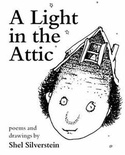

In [ ]:
im('http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg')
# colab show img way1

In [ ]:
# colab show img way2
%%html
<img src='http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'/>


In [ ]:
from PIL import Image
import numpy as np
from io import BytesIO

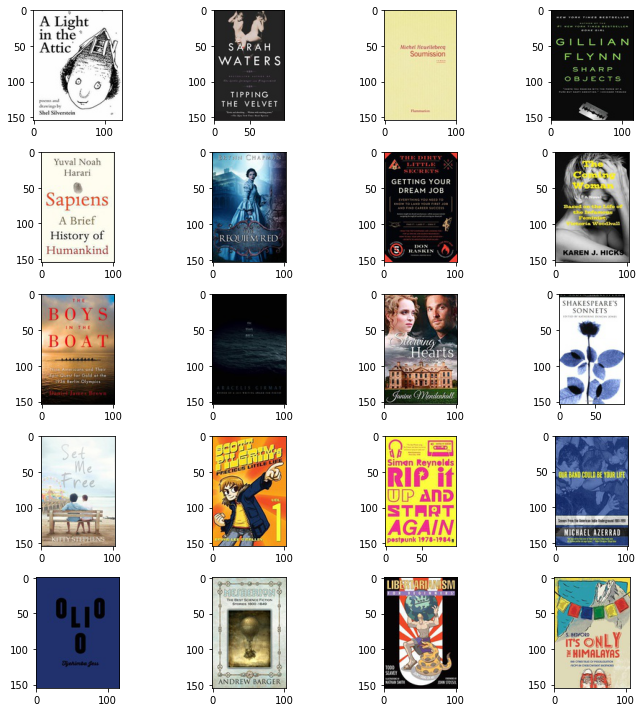

In [ ]:
fig=plt.figure(figsize=(10, 10))
# 就像拿了一張白紙
columns = 4          #畫布要畫幾張圖
rows = 5
loc_no = 1
a = 1
for i in soup.select('.image_container img'): 
    res = requests.get('http://books.toscrape.com/{}'.format(i['src'])) #圖片用request去抓圖片
    pil_im = Image.open(BytesIO(res.content))                           #用很像excel的東西來開檔案
    im_array = np.asarray(pil_im)                                       #轉換用圖
    fig.add_subplot(rows, columns, loc_no)
    #  畫圖順序: 左至右 上至下
    plt.imshow(im_array)                                                #這個一定要打才會顯示
    #  開始製圖
    loc_no+=1                                                           #每個for loop就會跳一次
    time.sleep(1)                                                        
plt.tight_layout()

## DIY


1.   follow the structure above
2.   show images of a different page 



In [ ]:
list_url = ['http://books.toscrape.com/{}.html'.format(i) for i in range(1,51)]

In [ ]:
list_url

['http://books.toscrape.com/1.html',
 'http://books.toscrape.com/2.html',
 'http://books.toscrape.com/3.html',
 'http://books.toscrape.com/4.html',
 'http://books.toscrape.com/5.html',
 'http://books.toscrape.com/6.html',
 'http://books.toscrape.com/7.html',
 'http://books.toscrape.com/8.html',
 'http://books.toscrape.com/9.html',
 'http://books.toscrape.com/10.html',
 'http://books.toscrape.com/11.html',
 'http://books.toscrape.com/12.html',
 'http://books.toscrape.com/13.html',
 'http://books.toscrape.com/14.html',
 'http://books.toscrape.com/15.html',
 'http://books.toscrape.com/16.html',
 'http://books.toscrape.com/17.html',
 'http://books.toscrape.com/18.html',
 'http://books.toscrape.com/19.html',
 'http://books.toscrape.com/20.html',
 'http://books.toscrape.com/21.html',
 'http://books.toscrape.com/22.html',
 'http://books.toscrape.com/23.html',
 'http://books.toscrape.com/24.html',
 'http://books.toscrape.com/25.html',
 'http://books.toscrape.com/26.html',
 'http://books.toscra

In [ ]:
# # list_url[0:3]
# for url in list_url[0:3]:
#   res = requests.get(url)
#   soup = BeautifulSoup(res.text)
#   print(res)

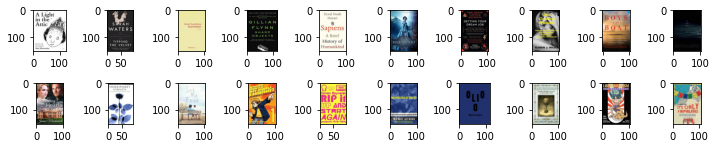

In [ ]:
fig=plt.figure(figsize=(10, 10))
# 就像拿了一張白紙
columns = 10          #畫布要畫幾張圖
rows = 10
loc_no = 1

for i in soup.select('.image_container img'): 
    res = requests.get('http://books.toscrape.com/{}'.format(i['src'])) #圖片用request去抓圖片
    pil_im = Image.open(BytesIO(res.content))                           #用很像excel的東西來開檔案
    im_array = np.asarray(pil_im)                                       #轉換用圖
    fig.add_subplot(rows, columns, loc_no)
    #  畫圖順序: 左至右 上至下
    plt.imshow(im_array)                                                #這個一定要打才會顯示
    #  開始製圖
    loc_no+=1                                                           #每個for loop就會跳一次
    time.sleep(1)                                                        
plt.tight_layout()

## Get a website

In [ ]:
# for page in range(1, 3): 
#   all_res = requests.get('http://books.toscrape.com/'+ str(page)) #靜態網頁通常會用get
# # 佛心的練習爬蟲網頁
# # 利用get方式去向網站要資料

In [ ]:

# all_res.status_code  #200代表成功 ，404代表找不到
# # 看看回應代碼
# # https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

## homework
1. make a csv about books' basic inforamtion
2. must have columns = ['title', 'Product Type, 'price', 'description']

tip: 


```
res = requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(res.text)
[i['href'] for i in soup.select('.image_container a')]

```




作業：利用bookname做一個dataframe，抓取每本書裡面的內容，例如數字或是書本代碼之類的

In [ ]:

# pd.DataFrame[]

In [ ]:
# ['http://books.toscrape.com/' + i['href'] for i in soup.select('.image_container a')]


# post to website

In [ ]:
# res = requests.post('https://httpbin.org/post', data='pipi')

In [ ]:
# soup = BeautifulSoup(res.text)

In [ ]:
# soup

In [ ]:
# url = 'https://academic.microsoft.com/api/search'

# data = {"query": "machine learning",
#         "queryExpression": "",
#         "filters": [],
#         "orderBy": None,
#         "skip": 0,
#         "sortAscending": True,
#         "take": 10}

# r = requests.post(url=url, json=data)

# result = r.json()


## Ptt Gossip


In [ ]:
# F12, network, all
# session:直白就是延續動作

# 我想要去看ptt八卦版，讓我繼續留下來看不要跳轉掉
payload = {
'from': '/bbs/Gossiping/index.html',
'yes': 'yes',
}
r = requests.session()                                       #session:任何伺服器能認出使用者狀態的時間區間
r.post('https://www.ptt.cc/ask/over18',data=payload)
# res = r.get('https://www.ptt.cc/bbs/Gossiping/index.html')
res = r.get('https://www.ptt.cc/bbs/Gossiping/index.html')

In [ ]:
soup = BeautifulSoup(res.text)

In [ ]:
aa=soup.select('.title')
aa

[<div class="title">
 <a href="/bbs/Gossiping/M.1617091214.A.A4A.html">Re: [問卦] 你的車被檢舉 你會謝謝檢舉達人嗎？</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091232.A.CC4.html">[問卦] 其實五樓是告白自肥樓吧</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091283.A.C34.html">Re: [新聞] YKK擁9億退休金竟裝窮　申請政府補助卻苛扣員工薪資</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091320.A.809.html">Re: [問卦] 你的車被檢舉 你會謝謝檢舉達人嗎？</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091359.A.2B7.html">Re: [問卦] 中國人為何堅持要侵略新疆維吾爾</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091556.A.F0B.html">[問卦] 筆電效能有可能追上桌機嗎</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091572.A.217.html">[新聞] 中國抵制才3天　H＆M「全場3折」被搶購一</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1617091620.A.DA2.html">Re: [問卦] 有只准自己公審別人不准別人公審自己的八</a>
 </div>, <div class="title">
 <a href="/bbs/Gossiping/M.1605971507.A.5C4.html">[公告] 八卦板板規(2020.11.21)</a>
 </div>, <div class="title">
 <a

In [ ]:
for title in aa:
 print(title.a.string)#取得文章標題
#  print(article-metaline)
 print("https://www.ptt.cc"+title.a.get("href"))#取得文章連結

Re: [問卦] 你的車被檢舉 你會謝謝檢舉達人嗎？
https://www.ptt.cc/bbs/Gossiping/M.1617091214.A.A4A.html
[問卦] 其實五樓是告白自肥樓吧
https://www.ptt.cc/bbs/Gossiping/M.1617091232.A.CC4.html
Re: [新聞] YKK擁9億退休金竟裝窮　申請政府補助卻苛扣員工薪資
https://www.ptt.cc/bbs/Gossiping/M.1617091283.A.C34.html
Re: [問卦] 你的車被檢舉 你會謝謝檢舉達人嗎？
https://www.ptt.cc/bbs/Gossiping/M.1617091320.A.809.html
Re: [問卦] 中國人為何堅持要侵略新疆維吾爾
https://www.ptt.cc/bbs/Gossiping/M.1617091359.A.2B7.html
[問卦] 筆電效能有可能追上桌機嗎
https://www.ptt.cc/bbs/Gossiping/M.1617091556.A.F0B.html
[新聞] 中國抵制才3天　H＆M「全場3折」被搶購一
https://www.ptt.cc/bbs/Gossiping/M.1617091572.A.217.html
Re: [問卦] 有只准自己公審別人不准別人公審自己的八
https://www.ptt.cc/bbs/Gossiping/M.1617091620.A.DA2.html
[公告] 八卦板板規(2020.11.21)
https://www.ptt.cc/bbs/Gossiping/M.1605971507.A.5C4.html
[協尋] 求台南永康區行車紀錄
https://www.ptt.cc/bbs/Gossiping/M.1616759477.A.FBC.html
[協尋] 屏東縣鹽埔鄉行車記錄
https://www.ptt.cc/bbs/Gossiping/M.1616758178.A.8A6.html
[協尋] 尋人-台南新營
https://www.ptt.cc/bbs/Gossiping/M.1616922895.A.120.html
[協尋] 貓咪協尋 / 北市和平東路一段、青田街
https://www.ptt.c

In [ ]:
import re

In [ ]:
  res_1 = r.get("https://www.ptt.cc/bbs/Gossiping/M.1617087328.A.286.html")
  soup_1 = BeautifulSoup(res_1.text)
  s = soup_1.select('#main-content')[0].text.split('※')[0].split('2021')[1]
  re.sub('\n','', s)

'瑞凡台灣人的問題是只想玩不想練因為打籃球好玩而已時間到乖乖回去唸書考進台青蕉畢業進發哥台GG或者當醫生才是正確的人生體育留給不唸書的社會底層不然會變成社會亂源但台灣社會底層還是比較少不像黑人不打籃球不唸書只能販毒台灣還可以去外送仔所以不用太認真練還有國外雖然地大但其實籃框沒有很多輸了可能半小時後才上沒事幹只好在旁邊運球不然要幹嘛台灣人網路吃到飽都在滑手機所以不會運球大概是這樣--'

In [ ]:

for title in aa:
  res_1 = r.get("https://www.ptt.cc/"+title.a.get("href"))
  soup_1 = BeautifulSoup(res_1.text)
  s = soup_1.select('#main-content')[0].text.split('※')[0].split('2021')[1] #因為裡面有2020，所以才會有bug
  re.sub('\n','', s)
  print(s)




事情是這樣的

觀察下來，每天都有數以萬計的五樓正在自爆

但是想想五樓其實是很好避免的
不想當也是有辦法閃

那麼五樓為什麼會自爆咧？

該不會五樓其實是自肥樓

大家以為的樓梗
其實在這這些人的心裡是不同的地方

根本是理想鄉，訴說小秘密的好所在

不過這麼推測也不是很準

到底五樓是不小心自爆還是自肥告白？





--




會喔！
謝謝帥哥把車車拍的美美的

構圖還不錯

我自行修圖了



https://i.imgur.com/hie3BVQ.jpg

--


世界各國也有很多類似的少數民族想要獨立的情況啦
這些少數民族為何想要獨立?只是因為他們比較倒霉，近代剛好是其他民族在此地建國
不然很多少數民族在以前也獨立建國過
像所謂的中國「東北」，其實也不屬於中國，應該是滿洲國

中國人很愛講說以前有漢人在新疆建立政權，不過就只是新疆的一部分歷史
這就跟以色列人已經流亡了近兩千年，而近代以色列住的是巴勒斯坦人
而以色列人就說我們要回到以色列，就說以色列是以色列固有領土一樣
不過就是拿一個大義名份，要來合理化自已侵略的行為

就跟現在中國人想要侵略台灣，就說以前台灣自古屬於中國
而台灣人就比維吾爾人好不少，因為台灣還是國家
但有些 台籍精神中國人 就是想要讓台灣變成新疆

--



以前的筆電就是又厚又重又大台
效能還落後桌機一大截
但現在電競筆電都越做越輕薄
相同規格效能也可以達到桌機的七八成
以後筆電效能有可能追上桌機嗎？
有卦否

-----
Sent from JPTT on my Asus ASUS_I01WD.

--
https://i.imgur.com/AELxhWK.jpg
https://i.imgur.com/ti14F3t.jpg
https://i.imgur.com/pOS0HOw.jpg

--


1.媒體來源:
三立

2.記者署名:
林辰彥

3.完整新聞標題:
中國抵制才3天　H＆M「全場3折」被搶購一空

4.完整新聞內文:
國際知名品牌H＆M在拒絕使用新疆棉花之後遭到抵制，中國大陸的一些H＆M商店、賣場原
本空無一人。中國利用民族主義，想讓外國知道中國人民的團結。但是H＆M在27日祭出「
全場3折」活動，民眾蜂湧而至，將H＆M各類衣物搶購一空。

中國網友在微博上發文提到，「HM被一搶而空，在商場裡看到

IndexError: ignored

In [ ]:
# res_1 = r.get('https://www.ptt.cc/bbs/Gossiping/M.1617087328.A.286.html')


In [ ]:
# soup_1 = BeautifulSoup(res_1.text)

In [ ]:
# s = soup_1.select('#main-content')[0].text.split('※')[0].split('2021')[1]

In [ ]:
# import re

In [ ]:
# re.sub('\n','', s)

## DIY


1.   follow the structure above
2.   show titles of a different page
3.   moreover, print the content of link


## Ptt Beauty

In [ ]:
#用cookie去做
url = 'https://www.ptt.cc/bbs/Beauty/M.1598951118.A.D6A.html'

resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

In [ ]:
output_dir = 'imgs'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag
image_tags = soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
        continue
    img_id = img_tag['href'].split('/')[-1]
    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}'.format(img_id)
    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:   #stream串流的意思
        r.raise_for_status()
        # 檢查圖片副檔名
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))

Save image imgs/pLwTOy2.jpg.jpeg
Save image imgs/qgTnQmz.jpg.jpeg
Save image imgs/lNAaJw4.jpg.jpeg
Save image imgs/9CnBUrt.gif.gif
Save image imgs/MjWzkJV.gif.gif
Save image imgs/2efx1Ut.gif.gif
Save image imgs/6bZi5rm.gif.gif
Save image imgs/wise79k.gif.gif
Save image imgs/sbWsTxv.jpg.jpeg
Save image imgs/rWrtWwp.jpg.jpeg
Save image imgs/pWjBou3.jpg.jpeg
Save image imgs/TKKYLNV.jpg.jpeg
Save image imgs/4Df3LGr.jpg.jpeg
Save image imgs/5r1b6F5.jpg.jpeg
Save image imgs/jm7F7GS.jpg.jpeg
Save image imgs/l9p3DW5.jpg.jpeg
Save image imgs/p9wE1T1.jpg.jpeg
Save image imgs/YnSvwhj.jpg.jpeg
Save image imgs/651d3S0.jpg.jpeg


In [ ]:
!pwd #確認自己在哪裡

/content


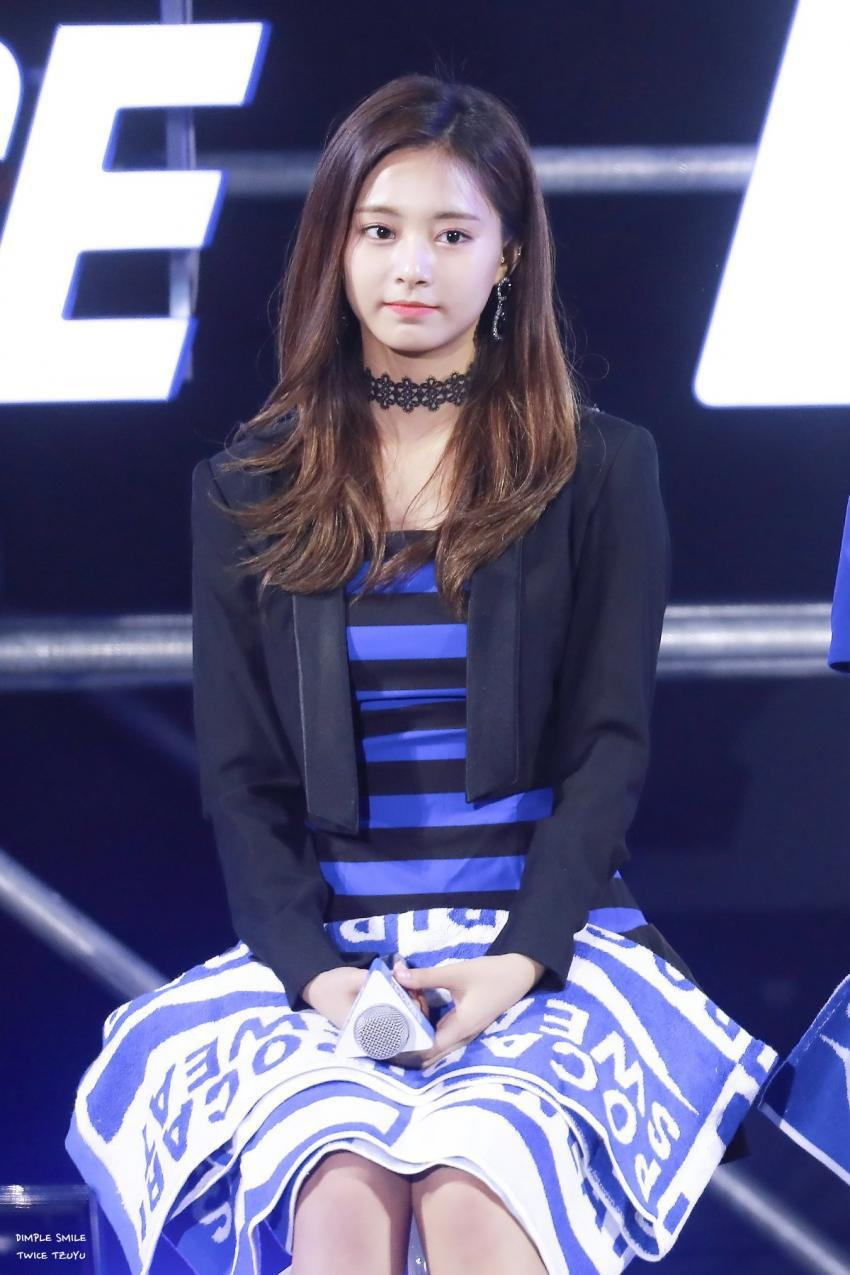

In [ ]:
im(filename='/content/imgs/p9wE1T1.jpg.jpeg', width=500, height=700)


In [ ]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1616978140.A.2AB.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

In [ ]:
!rm -rf imgs/*

In [ ]:
output_dir = 'imgs'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag
image_tags = soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
        continue
    img_id = img_tag['href'].split('/')[-1]
    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}'.format(img_id)
    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status()
        # 檢查圖片副檔名
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))

Save image imgs/EOk8Axp.jpg.jpeg
Save image imgs/MnkqRXZ.jpg.jpeg
Save image imgs/VInmqHR.jpg.jpeg
Save image imgs/XMbVKTk.jpg.jpeg
Save image imgs/WLjp5gp.jpg.jpeg
Save image imgs/EBZ9ohQ.jpg.jpeg
Save image imgs/cvN37w0.jpg.jpeg
Save image imgs/6vUhSLh.jpg.jpeg
Save image imgs/aDRE90q.jpg.jpeg
Save image imgs/gHywBOO.jpg.jpeg
Save image imgs/eZcpsNX.jpg.jpeg
Save image imgs/qUv9iM9.jpg.jpeg


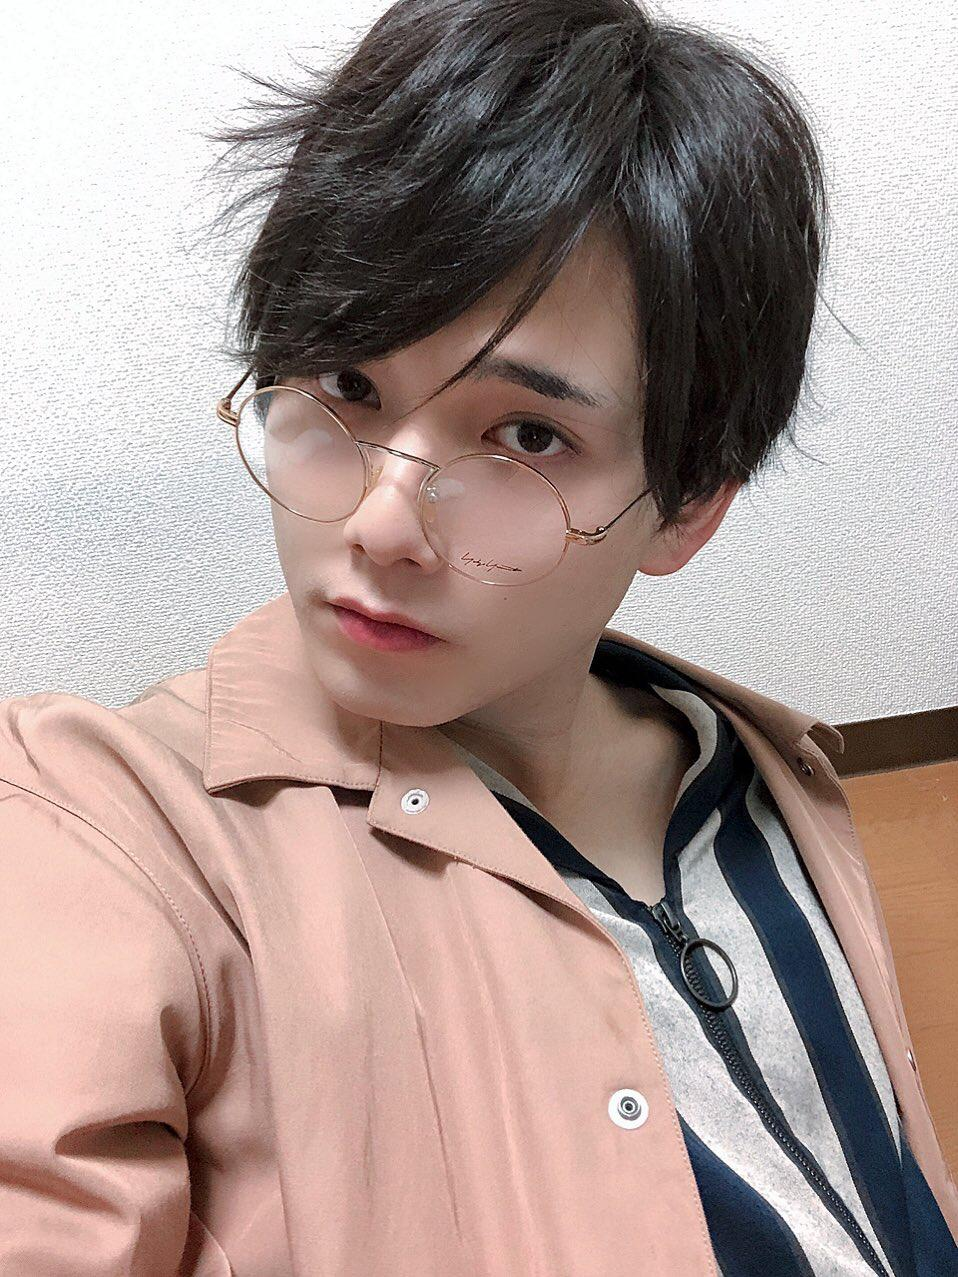

In [ ]:
im(filename='/content/imgs/qUv9iM9.jpg.jpeg', width=500, height=700)


# 氣象觀測站資料

In [ ]:
# https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-28#
# https://e-service.cwb.gov.tw/HistoryDataQuery/

In [ ]:
url=('https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466910&stname=%25E9%259E%258D%25E9%2583%25A8&datepicker=2021-03-29#')

In [ ]:
pd.read_html(url)

[                        0  ...                                            9
 0  æ¥å ±è¡¨ (daily data)  ...  è³æå®ç¾©è«è©³è¦ âç¶²é èªªæReadme
 
 [1 rows x 10 columns],
    Unnamed: 0_level_0             Press  ...             UVI           Cloud
    è§æ¸¬æé(hour) æ¸¬ç«æ°£å£(hPa)  ... ç´«å¤ç·ææ¸ ç¸½é²é(0~10)
               ObsTime           StnPres  ...             UVI    Cloud Amount
 0                   1             917.5  ...               0             ...
 1                   2             917.2  ...               0             ...
 2                   3             917.0  ...               0             ...
 3                   4             916.9  ...               0             ...
 4                   5             917.0  ...               0             0.0
 5                   6             917.3  ...               0             ...
 6                   7             917.8  ...               0             ...
 7                   8             918.3

In [ ]:
payload = {
        "command": "viewMain",
        "station": "466920",
        "stname": "%E8%87%BA%E5%8C%97",
        "datepicker": "2021-03-28",
        }


In [ ]:
res = requests.get('https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do', params=payload)

In [ ]:
# soup = BeautifulSoup(res.text)

In [ ]:
pd.read_html(res.text)

[                  0             1  ...   8                    9
 0  日報表 (daily data)  測站:466920_臺北  ... NaN  資料定義請詳見 ◎網頁說明Readme
 
 [1 rows x 10 columns],
    Unnamed: 0_level_0     Press             ... visibility   UVI        Cloud
            觀測時間(hour) 測站氣壓(hPa) 海平面氣壓(hPa)  ...    能見度(km) 紫外線指數    總雲量(0~10)
               ObsTime   StnPres    SeaPres  ...       Visb   UVI Cloud Amount
 0                   1    1006.2     1009.7  ...        ...     0          ...
 1                   2    1005.5     1009.0  ...        ...     0          ...
 2                   3    1005.0     1008.5  ...        ...     0          ...
 3                   4    1005.1     1008.6  ...        ...     0          ...
 4                   5    1005.3     1008.9  ...        ...     0          ...
 5                   6    1005.6     1009.2  ...        ...     0          ...
 6                   7    1006.0     1009.5  ...        ...     0          ...
 7                   8    1006.3     1009.8  ...      

In [ ]:
s = '臺北'

In [ ]:
requests.utils.quote(s.encode('utf8'))
# 網址需要轉換成電腦能理解的代碼
# 透過python 先將文字轉換成utf8編碼
# 再轉換成網頁常用的編碼

'%E8%87%BA%E5%8C%97'

In [ ]:
# http://e-service.cwb.gov.tw/wdps/obs/state.htm#%B2%7B%A6s%B4%FA%AF%B8
# 觀測站列表

## DIY

1.   爬取列表
2.   站名轉換成URL-encoded format
3.   修改payload內容並抓取
4.   抓取所有臺中市觀測站





In [ ]:
# https://e-service.cwb.gov.tw/HistoryDataQuery/
# https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466910&stname=%25E9%259E%258D%25E9%2583%25A8&datepicker=2021-02-02